In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [4]:
# DeepExtraTrees
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/mnist.json")  
gc = GCForest(config)

In [5]:
# count of class
len(np.unique(y_train))

10

In [6]:
# X_enc is the concatenated predict_proba result of DeepExtraTrees
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
# Make data + estimators
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

# New data
X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

# predict  data + Es
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-27 23:10:24,041][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 784)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 784)],y_test.shape=(10000,)
[ 2018-07-27 23:10:24,099][cascade_classifier.fit_transform] group_dims=[784]
[ 2018-07-27 23:10:24,104][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:10:24,108][cascade_classifier.fit_transform] group_ends=[784]
[ 2018-07-27 23:10:24,112][cascade_classifier.fit_transform] X_train.shape=(60000, 784),X_test.shape=(10000, 784)
[ 2018-07-27 23:10:24,281][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 784), X_cur_test.shape=(10000, 784)
[ 2018-07-27 23:10:37,959][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.25%
[ 2018-07-27 23:10:52,074][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.22%
[ 2018-07-27 23:11:06,625][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

Test Accuracy of DeepExtratTrees = 97.360000 %
[[ 969    0    0    0    0    2    5    1    3    0]
 [   0 1124    3    3    0    1    2    0    1    1]
 [   6    0 1000    5    3    0    3   10    5    0]
 [   0    0    7  980    0    6    0    9    5    3]
 [   1    0    2    0  958    0    6    0    2   13]
 [   3    0    0    8    1  867    6    1    4    2]
 [   7    3    0    0    2    2  943    0    1    0]
 [   1    3   16    1    0    0    0  991    1   15]
 [   4    0    2    8    3    4    2    3  942    6]
 [   4    7    2    9   10    4    1    5    5  962]]


             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.97      0.97      1032
          3       0.97      0.97      0.97      1010
          4       0.98      0.98      0.98       982
          5       0.98      0.97      0.98       892
          6       0.97      0.98      0.98      

[ 2018-07-27 23:12:54,822][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 794)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 794)],y_test.shape=(10000,)
[ 2018-07-27 23:12:54,914][cascade_classifier.fit_transform] group_dims=[794]
[ 2018-07-27 23:12:54,915][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:12:54,916][cascade_classifier.fit_transform] group_ends=[794]
[ 2018-07-27 23:12:54,917][cascade_classifier.fit_transform] X_train.shape=(60000, 794),X_test.shape=(10000, 794)
[ 2018-07-27 23:12:55,151][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 794), X_cur_test.shape=(10000, 794)
[ 2018-07-27 23:13:12,401][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.85%
[ 2018-07-27 23:13:27,233][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.58%
[ 2018-07-27 23:13:38,217][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

Test Accuracy of DeepExtratTrees = 97.780000 %
[[ 971    0    1    0    0    2    2    1    3    0]
 [   0 1123    3    3    0    2    2    0    1    1]
 [   6    0 1006    4    1    0    1    9    5    0]
 [   0    0    4  986    0    5    0    7    6    2]
 [   1    0    2    0  962    0    4    1    2   10]
 [   2    0    1    9    0  870    4    1    4    1]
 [   4    2    0    0    2    3  944    0    3    0]
 [   1    2   14    0    0    0    0 1000    1   10]
 [   4    0    2    6    2    4    1    3  946    6]
 [   3    4    2    8    8    2    1    5    6  970]]


             precision    recall  f1-score   support

          0       0.98      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.97      0.97      1032
          3       0.97      0.98      0.97      1010
          4       0.99      0.98      0.98       982
          5       0.98      0.98      0.98       892
          6       0.98      0.99      0.98      

In [7]:
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")

[ 2018-07-27 23:21:08,149][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 802)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 802)],y_test.shape=(10000,)
[ 2018-07-27 23:21:08,239][cascade_classifier.fit_transform] group_dims=[802]
[ 2018-07-27 23:21:08,246][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:21:08,251][cascade_classifier.fit_transform] group_ends=[802]
[ 2018-07-27 23:21:08,266][cascade_classifier.fit_transform] X_train.shape=(60000, 802),X_test.shape=(10000, 802)
[ 2018-07-27 23:21:08,471][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 802), X_cur_test.shape=(10000, 802)
[ 2018-07-27 23:21:21,825][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.00%
[ 2018-07-27 23:21:31,329][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.05%
[ 2018-07-27 23:21:44,966][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.000000 %', 'Layer :', 0)
[[ 971    0    1    0    0    1    3    1    3    0]
 [   0 1125    3    3    0    1    1    0    1    1]
 [   3    0 1011    2    1    0    0    9    6    0]
 [   0    0    3  990    0    4    0    7    5    1]
 [   1    0    2    0  965    0    4    1    2    7]
 [   2    0    1    6    0  873    3    1    4    2]
 [   5    2    0    0    2    3  941    0    5    0]
 [   1    1   14    2    0    0    0 1001    1    8]
 [   2    0    2    3    2    5    1    3  952    4]
 [   1    3    1    8    8    3    1    5    8  971]]


             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.98      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.98       982
          5       0.98      0.98      0.98       892
          6       0.99      0.

[ 2018-07-27 23:23:25,703][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 810)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 810)],y_test.shape=(10000,)
[ 2018-07-27 23:23:25,789][cascade_classifier.fit_transform] group_dims=[810]
[ 2018-07-27 23:23:25,790][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:23:25,791][cascade_classifier.fit_transform] group_ends=[810]
[ 2018-07-27 23:23:25,792][cascade_classifier.fit_transform] X_train.shape=(60000, 810),X_test.shape=(10000, 810)
[ 2018-07-27 23:23:25,877][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 810), X_cur_test.shape=(10000, 810)
[ 2018-07-27 23:23:35,642][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.24%
[ 2018-07-27 23:23:50,019][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.98%
[ 2018-07-27 23:24:04,197][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.120000 %', 'Layer :', 1)
[[ 971    0    1    0    0    2    2    1    3    0]
 [   0 1126    2    2    0    1    2    0    1    1]
 [   4    0 1012    2    1    0    0    8    5    0]
 [   0    0    2  991    0    4    0    7    5    1]
 [   1    0    2    0  965    0    4    2    2    6]
 [   2    0    0    6    0  874    3    1    4    2]
 [   4    2    0    0    2    4  941    0    5    0]
 [   1    1   11    2    0    0    0 1002    2    9]
 [   2    0    2    2    2    4    0    3  956    3]
 [   2    3    1    6    7    2    1    5    8  974]]


             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0.

[ 2018-07-27 23:25:46,312][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 818)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 818)],y_test.shape=(10000,)
[ 2018-07-27 23:25:46,393][cascade_classifier.fit_transform] group_dims=[818]
[ 2018-07-27 23:25:46,394][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:25:46,395][cascade_classifier.fit_transform] group_ends=[818]
[ 2018-07-27 23:25:46,395][cascade_classifier.fit_transform] X_train.shape=(60000, 818),X_test.shape=(10000, 818)
[ 2018-07-27 23:25:46,480][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 818), X_cur_test.shape=(10000, 818)
[ 2018-07-27 23:26:00,283][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.19%
[ 2018-07-27 23:26:14,486][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.98%
[ 2018-07-27 23:26:28,724][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.190000 %', 'Layer :', 2)
[[ 972    0    1    0    0    0    2    1    4    0]
 [   0 1125    2    2    0    1    2    0    2    1]
 [   3    0 1013    2    1    0    0    8    5    0]
 [   0    0    1  993    0    4    0    7    5    0]
 [   0    0    2    0  967    0    4    3    2    4]
 [   2    0    0    6    0  873    3    1    4    3]
 [   4    2    0    0    2    4  940    0    6    0]
 [   1    1    9    2    0    0    0 1002    4    9]
 [   2    0    2    2    2    3    0    3  957    3]
 [   2    3    1    5    7    2    1    4    7  977]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0.

[ 2018-07-27 23:28:14,014][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 826)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 826)],y_test.shape=(10000,)
[ 2018-07-27 23:28:14,126][cascade_classifier.fit_transform] group_dims=[826]
[ 2018-07-27 23:28:14,127][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:28:14,130][cascade_classifier.fit_transform] group_ends=[826]
[ 2018-07-27 23:28:14,131][cascade_classifier.fit_transform] X_train.shape=(60000, 826),X_test.shape=(10000, 826)
[ 2018-07-27 23:28:14,336][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 826), X_cur_test.shape=(10000, 826)
[ 2018-07-27 23:28:27,582][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-27 23:28:42,896][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.18%
[ 2018-07-27 23:28:56,609][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.200000 %', 'Layer :', 3)
[[ 972    0    0    0    0    0    2    1    5    0]
 [   0 1125    2    2    0    1    2    0    2    1]
 [   3    0 1013    2    1    0    0    8    5    0]
 [   0    0    1  993    0    5    0    6    5    0]
 [   0    0    1    0  967    0    4    3    3    4]
 [   2    0    0    6    0  872    3    1    4    4]
 [   4    2    1    0    2    4  940    0    5    0]
 [   0    1    8    2    0    0    0 1003    3   11]
 [   1    0    2    2    2    3    0    3  959    2]
 [   2    3    1    4    7    2    1    4    9  976]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0.

[ 2018-07-27 23:30:35,295][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 834)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 834)],y_test.shape=(10000,)
[ 2018-07-27 23:30:35,489][cascade_classifier.fit_transform] group_dims=[834]
[ 2018-07-27 23:30:35,506][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:30:35,508][cascade_classifier.fit_transform] group_ends=[834]
[ 2018-07-27 23:30:35,512][cascade_classifier.fit_transform] X_train.shape=(60000, 834),X_test.shape=(10000, 834)
[ 2018-07-27 23:30:35,612][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 834), X_cur_test.shape=(10000, 834)
[ 2018-07-27 23:30:49,393][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.17%
[ 2018-07-27 23:31:03,934][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.28%
[ 2018-07-27 23:31:17,769][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.210000 %', 'Layer :', 4)
[[ 972    0    0    0    0    0    2    1    5    0]
 [   0 1125    2    2    0    1    2    0    2    1]
 [   3    0 1014    2    1    0    0    8    4    0]
 [   0    0    2  994    0    4    0    5    5    0]
 [   0    0    1    0  967    0    4    3    3    4]
 [   2    0    0    7    0  871    3    1    4    4]
 [   4    2    1    0    2    4  940    0    5    0]
 [   0    1    8    2    0    0    0 1005    4    8]
 [   2    0    2    2    2    3    0    3  958    2]
 [   1    3    1    4    7    3    1    4   10  975]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0.

[ 2018-07-27 23:33:05,837][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 842)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 842)],y_test.shape=(10000,)
[ 2018-07-27 23:33:06,014][cascade_classifier.fit_transform] group_dims=[842]
[ 2018-07-27 23:33:06,016][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:33:06,017][cascade_classifier.fit_transform] group_ends=[842]
[ 2018-07-27 23:33:06,030][cascade_classifier.fit_transform] X_train.shape=(60000, 842),X_test.shape=(10000, 842)
[ 2018-07-27 23:33:06,133][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 842), X_cur_test.shape=(10000, 842)
[ 2018-07-27 23:33:23,183][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.27%
[ 2018-07-27 23:33:42,483][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.25%
[ 2018-07-27 23:33:59,699][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.250000 %', 'Layer :', 5)
[[ 973    0    0    0    0    0    1    1    5    0]
 [   0 1125    2    2    0    1    2    0    2    1]
 [   3    0 1014    1    1    0    0    8    5    0]
 [   0    0    2  994    0    5    0    5    4    0]
 [   0    0    1    0  967    0    4    3    3    4]
 [   2    0    0    7    0  872    3    1    4    3]
 [   4    2    1    0    2    4  939    0    6    0]
 [   0    1    7    2    0    0    0 1008    4    6]
 [   1    0    2    2    2    3    0    3  959    2]
 [   1    3    1    4    8    2    1    4   11  974]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0.

[ 2018-07-27 23:36:14,943][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 850)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 850)],y_test.shape=(10000,)
[ 2018-07-27 23:36:15,100][cascade_classifier.fit_transform] group_dims=[850]
[ 2018-07-27 23:36:15,104][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:36:15,108][cascade_classifier.fit_transform] group_ends=[850]
[ 2018-07-27 23:36:15,112][cascade_classifier.fit_transform] X_train.shape=(60000, 850),X_test.shape=(10000, 850)
[ 2018-07-27 23:36:15,265][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 850), X_cur_test.shape=(10000, 850)
[ 2018-07-27 23:36:33,276][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-27 23:36:48,615][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.22%
[ 2018-07-27 23:37:07,962][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.250000 %', 'Layer :', 6)
[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1125    1    3    0    1    2    0    2    1]
 [   3    0 1015    1    1    0    0    7    5    0]
 [   0    0    2  994    0    5    0    5    4    0]
 [   0    0    1    0  967    0    4    3    3    4]
 [   2    0    0    7    0  873    3    1    4    2]
 [   4    2    1    0    2    3  940    0    6    0]
 [   0    1    8    2    0    0    0 1007    4    6]
 [   2    0    2    2    2    3    0    3  958    2]
 [   2    3    1    4    8    2    1    4   11  973]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0.

[ 2018-07-27 23:39:21,608][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 858)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 858)],y_test.shape=(10000,)
[ 2018-07-27 23:39:21,765][cascade_classifier.fit_transform] group_dims=[858]
[ 2018-07-27 23:39:21,783][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:39:21,788][cascade_classifier.fit_transform] group_ends=[858]
[ 2018-07-27 23:39:21,792][cascade_classifier.fit_transform] X_train.shape=(60000, 858),X_test.shape=(10000, 858)
[ 2018-07-27 23:39:21,950][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 858), X_cur_test.shape=(10000, 858)
[ 2018-07-27 23:39:38,439][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.29%
[ 2018-07-27 23:39:56,974][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.28%
[ 2018-07-27 23:40:13,507][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.290000 %', 'Layer :', 7)
[[ 971    0    0    0    0    0    3    1    5    0]
 [   0 1125    2    2    0    1    2    0    2    1]
 [   3    0 1016    0    1    0    0    7    5    0]
 [   0    0    2  994    0    5    0    5    4    0]
 [   0    0    1    0  967    0    4    3    3    4]
 [   2    0    0    7    0  873    3    1    4    2]
 [   4    2    1    0    2    3  941    0    5    0]
 [   0    1    7    2    0    0    0 1008    4    6]
 [   2    0    2    1    2    3    0    3  959    2]
 [   1    3    1    4    8    2    1    4   10  975]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0.

[ 2018-07-27 23:42:31,685][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 866)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 866)],y_test.shape=(10000,)
[ 2018-07-27 23:42:31,816][cascade_classifier.fit_transform] group_dims=[866]
[ 2018-07-27 23:42:31,817][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:42:31,822][cascade_classifier.fit_transform] group_ends=[866]
[ 2018-07-27 23:42:31,823][cascade_classifier.fit_transform] X_train.shape=(60000, 866),X_test.shape=(10000, 866)
[ 2018-07-27 23:42:31,921][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 866), X_cur_test.shape=(10000, 866)
[ 2018-07-27 23:42:51,241][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.27%
[ 2018-07-27 23:43:10,147][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.22%
[ 2018-07-27 23:43:26,265][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.340000 %', 'Layer :', 8)
[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1126    1    3    0    1    2    0    1    1]
 [   3    0 1016    0    1    0    0    7    5    0]
 [   0    0    2  995    0    5    0    4    4    0]
 [   0    0    1    0  967    0    4    3    3    4]
 [   2    0    0    6    0  874    3    1    4    2]
 [   4    2    1    0    2    3  941    0    5    0]
 [   0    1    7    2    0    0    0 1008    4    6]
 [   1    0    2    1    2    3    0    4  959    2]
 [   1    3    1    4    8    2    1    4   10  975]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.99      0.98      0.98      1032
          3       0.98      0.99      0.98      1010
          4       0.99      0.98      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0.

[ 2018-07-27 23:45:40,359][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 874)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 874)],y_test.shape=(10000,)
[ 2018-07-27 23:45:40,475][cascade_classifier.fit_transform] group_dims=[874]
[ 2018-07-27 23:45:40,480][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:45:40,484][cascade_classifier.fit_transform] group_ends=[874]
[ 2018-07-27 23:45:40,502][cascade_classifier.fit_transform] X_train.shape=(60000, 874),X_test.shape=(10000, 874)
[ 2018-07-27 23:45:40,615][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 874), X_cur_test.shape=(10000, 874)
[ 2018-07-27 23:45:57,971][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-27 23:46:22,009][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.27%
[ 2018-07-27 23:46:40,102][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.330000 %', 'Layer :', 9)
[[ 972    0    0    0    0    0    2    1    5    0]
 [   0 1126    2    2    0    1    2    0    1    1]
 [   3    0 1016    0    1    0    0    7    5    0]
 [   0    0    2  996    0    4    0    4    4    0]
 [   0    0    1    0  967    0    4    3    3    4]
 [   2    0    0    6    0  874    3    1    4    2]
 [   4    2    1    0    2    3  941    0    5    0]
 [   0    1    7    3    0    0    0 1007    4    6]
 [   1    0    2    1    2    3    0    4  959    2]
 [   1    3    1    4    8    3    1    4    9  975]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.99      0.99      1010
          4       0.99      0.98      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0.

[ 2018-07-27 23:49:04,883][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 882)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 882)],y_test.shape=(10000,)
[ 2018-07-27 23:49:04,967][cascade_classifier.fit_transform] group_dims=[882]
[ 2018-07-27 23:49:04,968][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:49:04,969][cascade_classifier.fit_transform] group_ends=[882]
[ 2018-07-27 23:49:04,970][cascade_classifier.fit_transform] X_train.shape=(60000, 882),X_test.shape=(10000, 882)
[ 2018-07-27 23:49:05,056][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 882), X_cur_test.shape=(10000, 882)
[ 2018-07-27 23:49:24,121][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-27 23:49:41,983][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.28%
[ 2018-07-27 23:49:54,513][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.370000 %', 'Layer :', 10)
[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1126    2    2    0    1    2    0    1    1]
 [   3    0 1015    1    1    0    0    7    5    0]
 [   0    0    2  997    0    4    0    3    4    0]
 [   1    0    1    0  967    0    4    3    2    4]
 [   2    0    0    5    0  875    3    1    4    2]
 [   4    2    1    0    2    3  941    0    5    0]
 [   0    1    7    3    0    0    0 1007    4    6]
 [   1    0    2    1    2    3    0    4  959    2]
 [   1    3    1    4    8    2    1    4    8  977]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.99      0.99      1010
          4       0.99      0.98      0.99       982
          5       0.99      0.98      0.98       892
          6       0.99      0

[ 2018-07-27 23:51:18,249][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 890)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 890)],y_test.shape=(10000,)
[ 2018-07-27 23:51:18,335][cascade_classifier.fit_transform] group_dims=[890]
[ 2018-07-27 23:51:18,336][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:51:18,337][cascade_classifier.fit_transform] group_ends=[890]
[ 2018-07-27 23:51:18,338][cascade_classifier.fit_transform] X_train.shape=(60000, 890),X_test.shape=(10000, 890)
[ 2018-07-27 23:51:18,427][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 890), X_cur_test.shape=(10000, 890)
[ 2018-07-27 23:51:28,912][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.37%
[ 2018-07-27 23:51:41,945][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.30%
[ 2018-07-27 23:51:52,330][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.330000 %', 'Layer :', 11)
[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1126    2    2    0    1    2    0    1    1]
 [   3    1 1014    1    1    0    0    7    5    0]
 [   0    0    2  997    0    4    0    3    4    0]
 [   0    0    1    0  968    0    4    3    2    4]
 [   2    0    0    5    0  875    3    1    4    2]
 [   4    2    1    0    2    3  941    0    5    0]
 [   0    1    7    3    0    0    0 1008    3    6]
 [   1    0    2    1    2    3    0    4  957    4]
 [   1    3    1    4    8    3    1    4   10  974]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0

[ 2018-07-27 23:53:14,735][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 898)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 898)],y_test.shape=(10000,)
[ 2018-07-27 23:53:14,823][cascade_classifier.fit_transform] group_dims=[898]
[ 2018-07-27 23:53:14,824][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:53:14,825][cascade_classifier.fit_transform] group_ends=[898]
[ 2018-07-27 23:53:14,827][cascade_classifier.fit_transform] X_train.shape=(60000, 898),X_test.shape=(10000, 898)
[ 2018-07-27 23:53:14,916][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 898), X_cur_test.shape=(10000, 898)
[ 2018-07-27 23:53:27,726][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.27%
[ 2018-07-27 23:53:38,758][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.28%
[ 2018-07-27 23:53:52,018][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.330000 %', 'Layer :', 12)
[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1126    2    2    0    1    2    0    1    1]
 [   3    1 1014    1    1    0    0    7    5    0]
 [   0    0    2  997    0    4    0    3    4    0]
 [   0    0    1    0  968    0    4    3    2    4]
 [   2    0    0    5    0  875    3    1    4    2]
 [   4    2    1    0    2    3  941    0    5    0]
 [   0    1    7    3    0    0    0 1008    3    6]
 [   1    0    2    1    2    3    0    4  957    4]
 [   1    3    1    4    8    3    1    4   10  974]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0

[ 2018-07-27 23:55:10,915][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 906)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 906)],y_test.shape=(10000,)
[ 2018-07-27 23:55:11,002][cascade_classifier.fit_transform] group_dims=[906]
[ 2018-07-27 23:55:11,003][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:55:11,003][cascade_classifier.fit_transform] group_ends=[906]
[ 2018-07-27 23:55:11,004][cascade_classifier.fit_transform] X_train.shape=(60000, 906),X_test.shape=(10000, 906)
[ 2018-07-27 23:55:11,094][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 906), X_cur_test.shape=(10000, 906)
[ 2018-07-27 23:55:22,114][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.22%
[ 2018-07-27 23:55:33,343][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.32%
[ 2018-07-27 23:55:45,545][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.370000 %', 'Layer :', 13)
[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1127    2    1    0    1    2    0    1    1]
 [   3    1 1014    1    1    0    0    7    5    0]
 [   0    0    2  997    0    4    0    3    4    0]
 [   0    0    1    0  968    0    4    3    2    4]
 [   2    0    0    6    0  875    3    1    4    1]
 [   4    2    1    0    2    3  941    0    5    0]
 [   0    1    7    2    0    0    0 1009    3    6]
 [   1    0    2    1    2    3    0    4  957    4]
 [   1    3    1    4    8    3    1    4    8  976]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0

[ 2018-07-27 23:57:10,152][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 914)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 914)],y_test.shape=(10000,)
[ 2018-07-27 23:57:10,240][cascade_classifier.fit_transform] group_dims=[914]
[ 2018-07-27 23:57:10,241][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:57:10,241][cascade_classifier.fit_transform] group_ends=[914]
[ 2018-07-27 23:57:10,242][cascade_classifier.fit_transform] X_train.shape=(60000, 914),X_test.shape=(10000, 914)
[ 2018-07-27 23:57:10,332][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 914), X_cur_test.shape=(10000, 914)
[ 2018-07-27 23:57:22,144][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.29%
[ 2018-07-27 23:57:33,968][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.30%
[ 2018-07-27 23:57:47,053][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.380000 %', 'Layer :', 14)
[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1127    2    1    0    1    2    0    1    1]
 [   3    1 1014    1    1    0    0    7    5    0]
 [   0    0    2  997    0    4    0    3    4    0]
 [   0    0    1    0  968    0    4    3    2    4]
 [   2    0    0    5    0  876    3    1    4    1]
 [   4    2    1    0    1    3  942    0    5    0]
 [   0    1    7    2    0    0    0 1010    3    5]
 [   2    0    2    1    2    3    0    4  956    4]
 [   1    3    1    4    8    3    1    5    8  975]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0

[ 2018-07-27 23:59:13,948][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 922)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 922)],y_test.shape=(10000,)
[ 2018-07-27 23:59:14,038][cascade_classifier.fit_transform] group_dims=[922]
[ 2018-07-27 23:59:14,040][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 23:59:14,040][cascade_classifier.fit_transform] group_ends=[922]
[ 2018-07-27 23:59:14,041][cascade_classifier.fit_transform] X_train.shape=(60000, 922),X_test.shape=(10000, 922)
[ 2018-07-27 23:59:14,133][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 922), X_cur_test.shape=(10000, 922)
[ 2018-07-27 23:59:25,931][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.24%
[ 2018-07-27 23:59:38,206][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.27%
[ 2018-07-27 23:59:53,284][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.350000 %', 'Layer :', 15)
[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1127    2    1    0    1    2    0    1    1]
 [   3    1 1014    1    1    0    0    7    5    0]
 [   0    0    2  997    0    4    0    3    4    0]
 [   0    0    1    0  968    0    4    3    2    4]
 [   2    0    0    5    0  877    2    1    4    1]
 [   4    2    1    0    2    3  941    0    5    0]
 [   0    2    7    3    0    0    0 1009    3    4]
 [   2    0    3    1    2    3    0    4  955    4]
 [   1    3    1    4    8    3    1    5    9  974]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0

[ 2018-07-28 00:01:20,896][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 930)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 930)],y_test.shape=(10000,)
[ 2018-07-28 00:01:20,986][cascade_classifier.fit_transform] group_dims=[930]
[ 2018-07-28 00:01:20,987][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 00:01:20,987][cascade_classifier.fit_transform] group_ends=[930]
[ 2018-07-28 00:01:20,988][cascade_classifier.fit_transform] X_train.shape=(60000, 930),X_test.shape=(10000, 930)
[ 2018-07-28 00:01:21,080][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 930), X_cur_test.shape=(10000, 930)
[ 2018-07-28 00:01:32,838][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.20%
[ 2018-07-28 00:01:46,149][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.32%
[ 2018-07-28 00:01:58,165][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.370000 %', 'Layer :', 16)
[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1127    2    1    0    1    2    0    1    1]
 [   3    1 1014    1    1    0    0    8    4    0]
 [   0    0    2  997    0    4    0    3    4    0]
 [   0    0    1    0  968    0    4    3    2    4]
 [   2    0    0    5    0  877    2    1    4    1]
 [   4    2    1    0    1    3  942    0    5    0]
 [   0    1    7    3    0    0    0 1010    3    4]
 [   1    0    3    1    2    4    0    4  955    4]
 [   1    3    1    4    8    3    1    5    9  974]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0

[ 2018-07-28 00:03:28,222][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 938)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 938)],y_test.shape=(10000,)
[ 2018-07-28 00:03:28,313][cascade_classifier.fit_transform] group_dims=[938]
[ 2018-07-28 00:03:28,314][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 00:03:28,315][cascade_classifier.fit_transform] group_ends=[938]
[ 2018-07-28 00:03:28,316][cascade_classifier.fit_transform] X_train.shape=(60000, 938),X_test.shape=(10000, 938)
[ 2018-07-28 00:03:28,409][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 938), X_cur_test.shape=(10000, 938)
[ 2018-07-28 00:03:36,449][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 00:03:45,619][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.35%
[ 2018-07-28 00:03:54,056][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.330000 %', 'Layer :', 17)
[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1127    2    1    0    1    2    0    1    1]
 [   3    1 1014    1    1    0    0    8    4    0]
 [   0    0    2  997    0    4    0    3    4    0]
 [   0    0    1    0  968    0    4    3    1    5]
 [   2    0    0    6    0  875    3    1    4    1]
 [   4    2    1    0    1    3  943    0    4    0]
 [   0    1    7    3    0    0    0 1010    3    4]
 [   1    0    3    2    2    4    0    4  954    4]
 [   1    3    1    4    8    3    1    6   10  972]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0

[ 2018-07-28 00:04:55,885][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 946)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 946)],y_test.shape=(10000,)
[ 2018-07-28 00:04:55,977][cascade_classifier.fit_transform] group_dims=[946]
[ 2018-07-28 00:04:55,978][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 00:04:55,979][cascade_classifier.fit_transform] group_ends=[946]
[ 2018-07-28 00:04:55,980][cascade_classifier.fit_transform] X_train.shape=(60000, 946),X_test.shape=(10000, 946)
[ 2018-07-28 00:04:56,075][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 946), X_cur_test.shape=(10000, 946)
[ 2018-07-28 00:05:04,198][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.27%
[ 2018-07-28 00:05:12,414][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.25%
[ 2018-07-28 00:05:20,868][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.360000 %', 'Layer :', 18)
[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1127    2    1    0    1    2    0    1    1]
 [   3    1 1014    1    1    0    0    7    5    0]
 [   0    0    2  997    0    4    0    3    4    0]
 [   0    0    1    0  968    0    4    3    1    5]
 [   2    0    0    6    0  877    2    1    4    0]
 [   4    2    1    0    1    3  942    0    5    0]
 [   0    1    7    3    0    0    0 1010    3    4]
 [   2    0    3    2    2    4    0    4  953    4]
 [   1    3    1    4    8    3    1    5    8  975]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0

[ 2018-07-28 00:06:25,186][cascade_classifier.fit_transform] X_groups_train.shape=[(60000, 954)],y_train.shape=(60000,),X_groups_test.shape=[(10000, 954)],y_test.shape=(10000,)
[ 2018-07-28 00:06:25,278][cascade_classifier.fit_transform] group_dims=[954]
[ 2018-07-28 00:06:25,279][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 00:06:25,280][cascade_classifier.fit_transform] group_ends=[954]
[ 2018-07-28 00:06:25,281][cascade_classifier.fit_transform] X_train.shape=(60000, 954),X_test.shape=(10000, 954)
[ 2018-07-28 00:06:25,375][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(60000, 954), X_cur_test.shape=(10000, 954)
[ 2018-07-28 00:06:33,551][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.19%
[ 2018-07-28 00:06:42,574][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.25%
[ 2018-07-28 00:06:51,726][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 98.330000 %', 'Layer :', 19)
[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1127    2    1    0    1    2    0    1    1]
 [   3    1 1014    1    1    0    0    7    5    0]
 [   0    0    2  998    0    4    0    3    3    0]
 [   0    0    1    0  968    0    4    3    2    4]
 [   2    0    0    7    0  875    2    1    5    0]
 [   4    2    1    0    1    3  942    0    5    0]
 [   0    1    7    2    0    0    0 1011    3    4]
 [   3    0    3    2    1    4    0    4  952    5]
 [   1    3    1    4    8    3    1    5   10  973]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0

('Opt_layer_num =', 14, ' Accuracy =', 98.38, 'Time =', 2225.6700000000001)


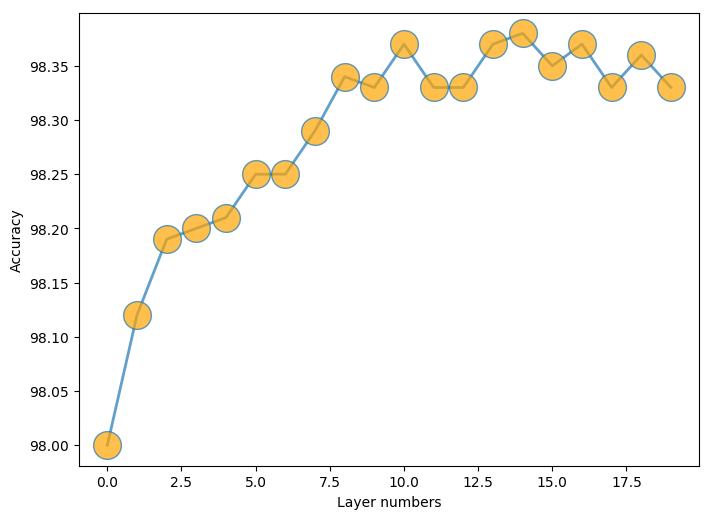

In [8]:
print ("Opt_layer_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Layer numbers')
plt.show()

In [9]:
Accuracy

[98.0,
 98.12,
 98.19,
 98.2,
 98.21,
 98.25,
 98.25,
 98.29,
 98.34,
 98.33,
 98.37,
 98.33,
 98.33,
 98.37,
 98.38,
 98.35,
 98.37,
 98.33,
 98.36,
 98.33]